### HBI Applied to Synthetical ERT Data of an Unconfined Aquifer

In this example, Hybrid Bayesian Inversion (HBI) is applied to interpret hydrological properties from ERT data collected along profile L1 (mcline1.dat) in a compound bar of the Great Miami River, acquired by McGarr et al. (2021). Borehole water table measurements are incorporated to evaluate the performance of HBI when constrained by hydrological observations (Zwt_observations.txt). To integrate these constraints, the prior distribution of the water table ($Z_{wt}$) was modified by weighting it with a multivariate Gaussian PDF, where the means correspond to borehole-measured water levels and the standard deviation is set to 10 cm.

The groundwater model ($\rho_{wt}$) follows the electrical resistivity formulation of an unconfined aquifer, as described in Bascur & Yañez (2025). It is parameterized by the water table depth ($Z_{wto}$), a $\beta$ factor defining the electrical-to-hydraulic conductivity relationship (CK-relationship), and the bulk resistivity of the aquifer ($\rho_{wt}$), assuming a conditional PDF based on Archie’s Law with limited calibration. The model parameters were assigned wide uniform priors as follows:

- $Z_{wto}$: Water table at the middle of the model, ranging from 0 to –2 m

- Archie's Law Parameters: cementation exponent $m$ from 1.5 to 2.5 and A (corrected water resistivity) from 1 to 30 ohm-m  

- $\phi$ (porosity): Ranging from 0.1 to 0.5

- $\beta$ (CK-relationship): Ranging from –0.5 to 0.5

The inversion allowed both positive and negative $\beta$ values, thereby removing any assumption about the sign of the CK-relationship.

The subsurface model used a 2D grid composed of 52 vertical by 115 horizontal cells (5980 total), with vertical cell heights of 0.125 m near the surface and 1 m wide horizontal cells along profile L1. The initial and reference background resistivity model ($\rho_{kbo}$) used in the M-step was set to 300 Ω·m, selected based on the smoothest background model from previous HBI runs.

In [9]:
import sys
sys.path.insert(0, '../../../Source/')
sys.path.insert(0, '../../../Utils/')

In [11]:
import paramplots
import plot_model_2d
import Zwt
import matplotlib.pyplot as plt
import numpy as np


The log file captures the evolution of $ \log P(\sigma_{bk} \mid d) $ throughout the E-step and M-step of the HBI iterations.

Below is a plot showing how $ \log P(\sigma_{bk} \mid d) $ changes over the course of the inversion process.


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\juan\AppData\Local\Temp\ipykernel_13368\2962367856.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.legend(['log $P(\sigma_{bk}|d)$'])


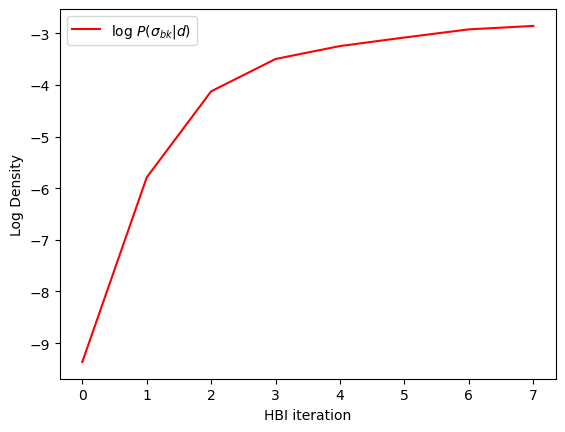

In [13]:
logs=plot_model_2d.load_logs('./Iterations')
iters=logs[:,0]
Psigma_bk=-logs[:,1]
plt.plot(iters,Psigma_bk,'red')
plt.xlabel('HBI iteration')
plt.ylabel('Log Density')
plt.legend(['log $P(\sigma_{bk}|d)$'])

Plot of inverted models from the 12th iteration (max log$P(\sigma_{bk}|d)$) of the Hybrid Bayesian Inversion (HBI):

-**Top plot**: Inverted background model

-**Middle plot**: Expected groundwater model

-**Bottom plot**: Inverted total model (background + expected groundwater models)

In the total model plot, the expected water table is represented by a solid black line, while the confidence interval ($1\sigma$) is shown as dashed black lines. Water level observations used to constrain the HBI are marked with red points.

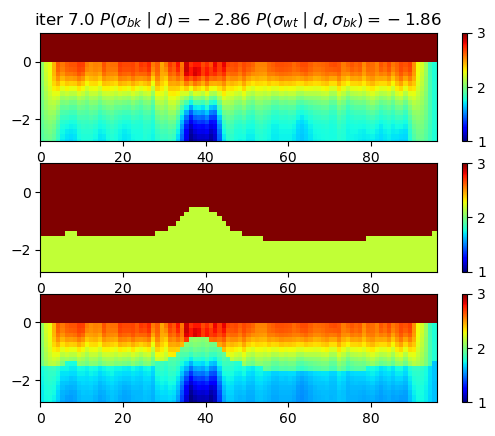

In [17]:
models=plot_model_2d.plot_models('.',7,estep_samples=2000)
#PZwt=Zwt.get_PZwt('./Posterior PDFs/model_wt__2000.0_Zwt_7.0mod','emwtinv.0.msh')

Plot the posterior probability density functions (PDFs) estimated from the 12th iteration of HBI for the following groundwater model parameters:

- **Bulk aquifer resistivity**  
- **Beta factor** from the CK-relationship  
- **Porosity**

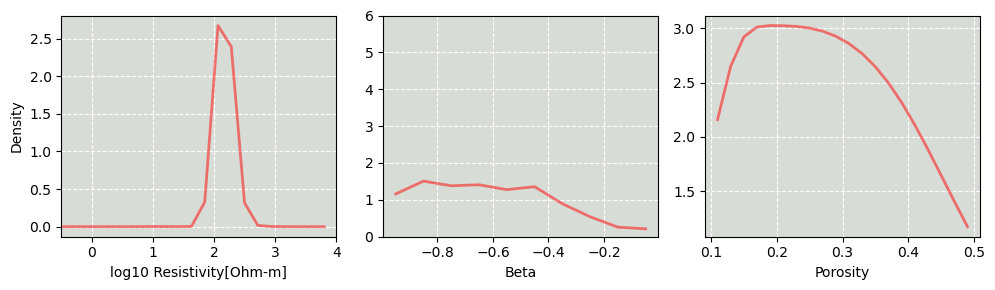

In [19]:
paramplots.paramplots('.',7,estep_samples=2000)